In [15]:
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

import skimage.io as sk
from Functions import image_processing as ip
from Functions import region_merging as rm
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from PIL import Image

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#image_intensity = sk.imread("Data/N2DL-HeLa/img/t75.tif")  # load image
#image_rg = sk.imread("Result_Pictures/Seeded_Region_Growing/N2DL-HeLa/srg_t75.tif")

In [3]:
#image_merged = rm.region_merging(image_rg, image_intensity, 0.1, 100)

#im2 = Image.fromarray(image_merged)
#im2.save("Result_Pictures/Seeded_Region_Growing/N2DL-HeLa/srg_t75_merged.tif")

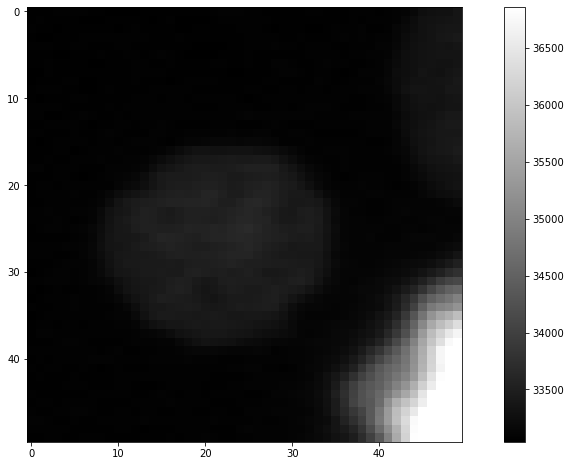

In [4]:
image_intensity = sk.imread("Data/N2DL-HeLa/img/t75.tif")
image_intensity = image_intensity[300:350, 450:500]
ip.show_image(image_intensity, 15, 8)

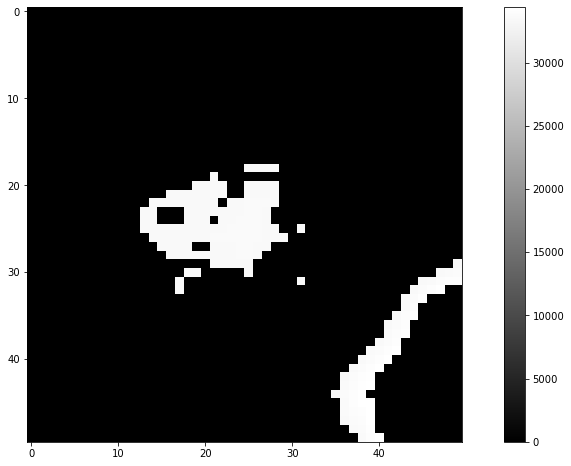

In [5]:
image_processed = image_intensity.copy()
image_processed = ip.remove_bright_spots(image_processed, 34400, 33026)
image_processed = ip.image_clipping_extreme(image_processed, 33500, 36000)
ip.show_image(image_processed, 15, 8)

0.1


C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ushort_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list


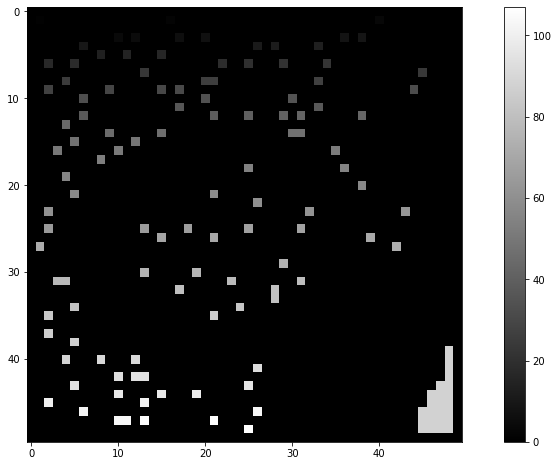

In [6]:
image_r = sd.seeds(image_intensity, 1)
image_r = sd.seed_merging(image_r)
#image_r = sd.decrease_region_number(image_r, 1)
image_seeds = Image.fromarray(image_r)
ip.show_image(image_r, 15, 8)

1000
2000


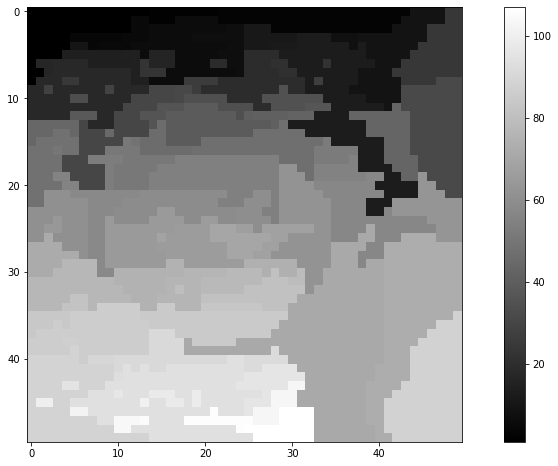

In [7]:
image_r = srg.region_growing(image_intensity, image_r)
ip.show_image(image_r, 15, 8)

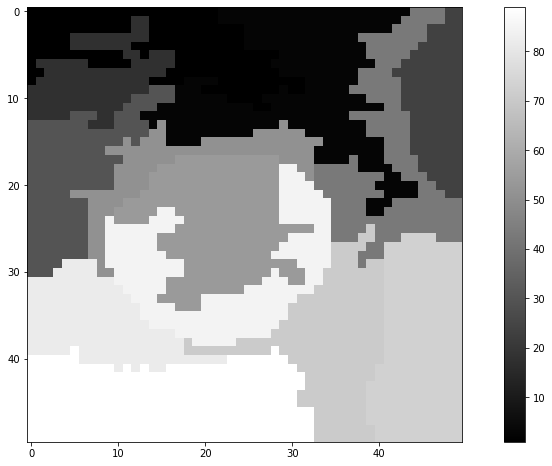

In [8]:
image_r = rm.region_merging(image_r, image_intensity, 0.0001, 100)
ip.show_image(image_r, 15, 8)









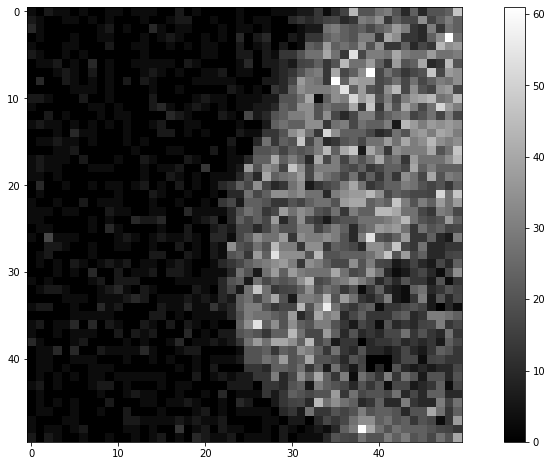

In [46]:
image_intensity = sk.imread("Data/N2DH-GOWT1/img/t31.tif")
image_intensity = image_intensity[300:350, 450:500]
ip.show_image(image_intensity, 15, 8)

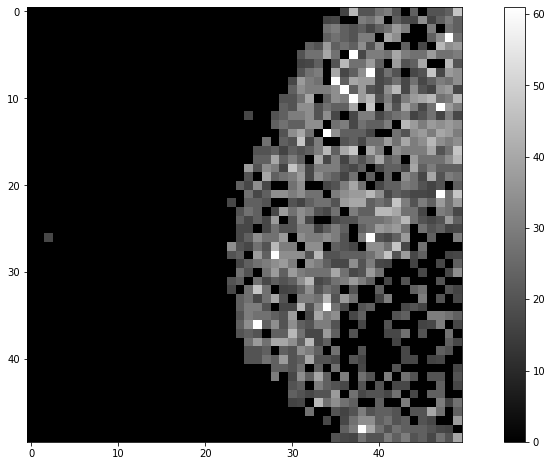

In [48]:
image_processed = image_intensity.copy()
#image_processed = ip.remove_bright_spots(image_processed, 34400, 33026)
image_processed = ip.image_clipping_extreme(image_processed, 15, 50)
ip.show_image(image_processed, 15, 8)

0.21311475409836064


C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list


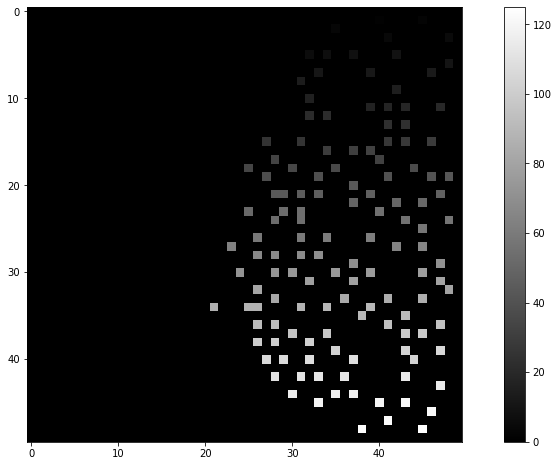

In [43]:
image_r = sd.seeds(image_intensity, 1)
image_r = sd.seed_merging(image_r)
#image_r = sd.decrease_region_number(image_r, 1)
image_seeds = Image.fromarray(image_r)
ip.show_image(image_r, 15, 8)

1000
2000


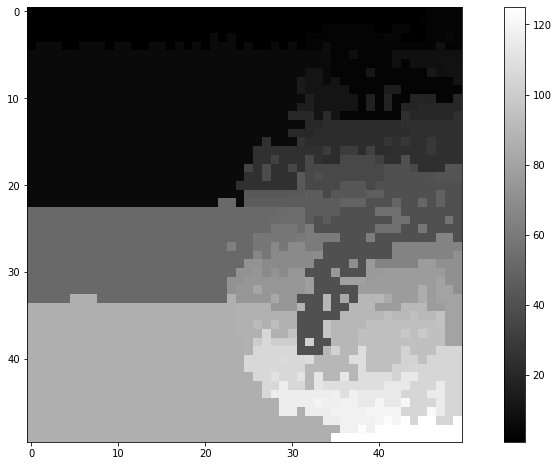

In [44]:
image_r = srg.region_growing(image_intensity, image_r)
ip.show_image(image_r, 15, 8)

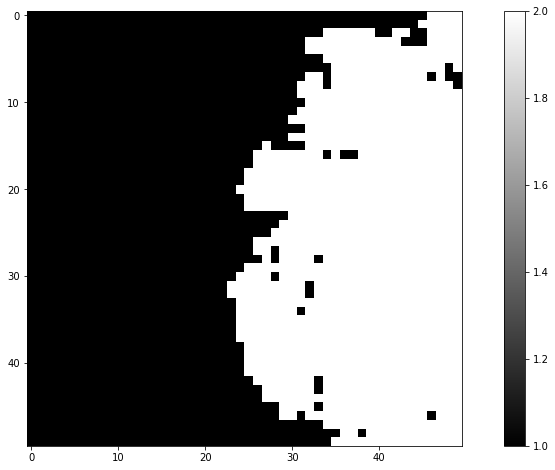

In [45]:
image_r = rm.region_merging(image_r, image_intensity, 0.2, 150)
ip.show_image(image_r, 15, 8)